# Survival, risk and hazard

This page discusses the relationship between survival curves, Relative Risk
(RR) and the Hazard Ratio (HR).

Let's start with a couple of idealized survival curves.

As usual, we'll show the working with some simple code as we go along, but you
should be able to follow the page even if you don't follow the code.

In [1]:
# Get the libraries we will use for this page.
import numpy as np  # Working with arrays.
import matplotlib.pyplot as plt  # Plotting

Our example survival curves will be for two treatments, A and B, over a period
of 10 years.

First we make a survival function for treatment A.   The survival function
gives us, for any time $t$, the proportion of people still alive at time $t$.
This survival function is an idealized mathematical calculation, but let's
pretend the values from the function represent actual measured survival at any
particular time $t$.

In [2]:
def survival_a(t):
    """ Calculate survival after treatment A, at time(s) t.
    """
    return np.exp(t) ** (-1 / 3)

The detail of the actual equation in `survival_a` is not much relevant here
— it's just a way to generate a typical-looking survival curve.

Now we can calculate the survival for a particular time - here - 5 years:

In [3]:
# Survival on treatment A after 5 years
survival_a(5)

np.float64(0.18887560283756186)

This tells us that around 19% of people survived 5 years or more on treatment
A.

In fact, the way we've written the function, we can also send it a sequence of
values for $t$, and it will calculate survival for all the values:

In [4]:
# Survival at 0, 2.5 and 5 years.
survival_a([0, 2.5, 5])

array([1.        , 0.43459821, 0.1888756 ])

Next we make an array to store *all* the times for which we imagine having
measured survival, in our idealized example.

In [5]:
dt = 0.001  # The gap between measurements.
# Times at which we imagine our measurements to have taken place (in years).
times = np.arange(0, stop=10, step=dt)
# Show the first 10 times.
times[:10]

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009])

We plot survival for A, by asking for survival for all our example times in the
`times` array above:

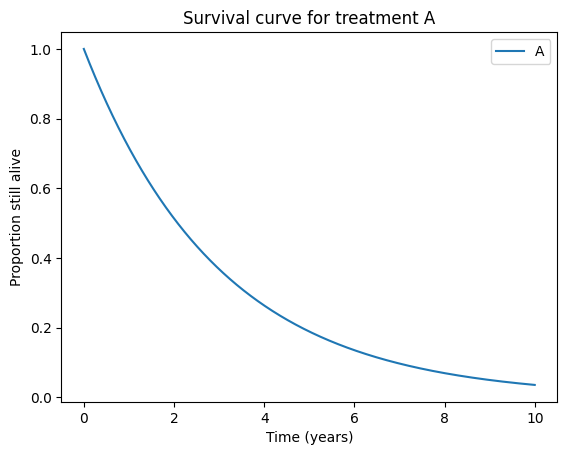

In [6]:
plt.plot(times, survival_a(times), label='A')
plt.xlabel('Time (years)')
plt.ylabel('Proportion still alive')
plt.title('Survival curve for treatment A')
plt.legend();

Now let's make another idealized curve for treatment B, and plot it together
with A.

In [7]:
def survival_b(t):
    """ Calculate survival after treatment B, at time(s) t.
    """
    return np.exp(t) ** (-1 / 1.25)

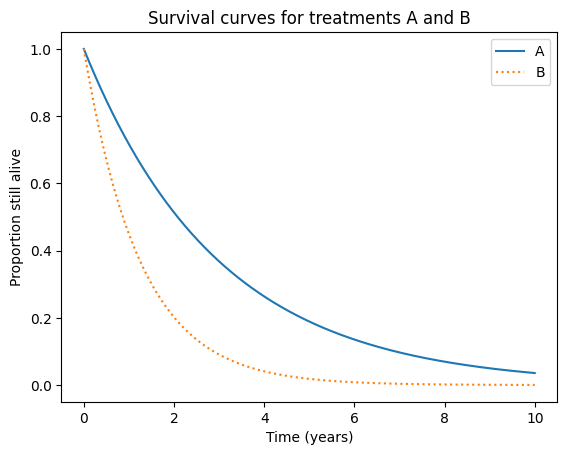

In [8]:
plt.plot(times, survival_a(times), label='A')
plt.plot(times, survival_b(times), linestyle=':', label='B')
plt.xlabel('Time (years)')
plt.ylabel('Proportion still alive')
plt.title('Survival curves for treatments A and B')
plt.legend();

## Relative risk

Relative risk (RR) is, as the name implies, one risk divided by another risk.
A typical RR is the relative risk of *death*.   For example, at any particular
time $t$ we can calculate the risk (proportion) of deaths with treatment
A — call this $p$ — and the risk of death for treatment B — call this $r$.  The
RR for that time is $r / p$.

For example, consider the survival values for A and B at 5 years.

In [9]:
survival_A_5 = survival_a(5)
print('A survival at 5 years:', survival_A_5)

A survival at 5 years: 0.18887560283756186


In [10]:
survival_B_5 = survival_b(5)
print('B survival at 5 years:', survival_B_5)

B survival at 5 years: 0.018315638888734175


The risk of death is the survival proportion (above) subtracted from 1:

In [11]:
risk_A_5 = 1 - survival_A_5
risk_B_5 = 1 - survival_B_5

The RR of death with A relative to B is:

In [12]:
rr_5 = risk_A_5 / risk_B_5
print('Relative risk at 5 years:', rr_5)

Relative risk at 5 years: 0.8262578373401468


This tells us that those having treatment A have 0.82 (82%) of the risk of
death suffered with treatment B.  Put another way, A has an 18% relative
reduction in death compared to B, at 5 years.

We can plot RR over time, by first calculating the *death* curves (which are
just the survival curves subtracted from 1):

In [13]:
death_A = 1 - survival_a(times)
death_B = 1 - survival_b(times)

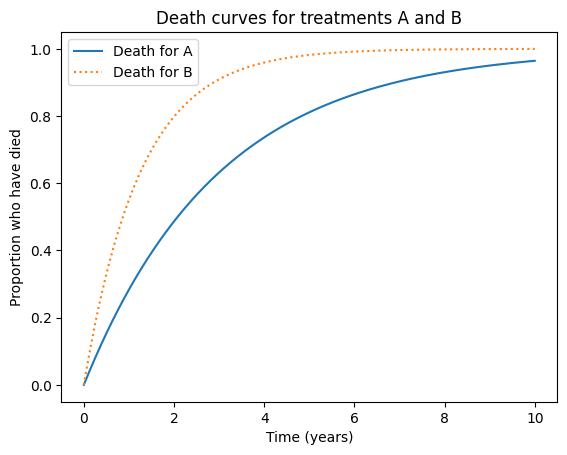

In [14]:
plt.plot(times, death_A, label='Death for A')
plt.plot(times, death_B, linestyle=':', label='Death for B')
plt.xlabel('Time (years)')
plt.ylabel('Proportion who have died')
plt.title('Death curves for treatments A and B')
plt.legend();

The death curves are the survival curves vertically flipped.

The RRs are the death values for A divided by those for B:

In [15]:
# We'll get a warning about dividing by 0 because deaths were 0
# at the beginning.
rr_A_rel_B = death_A / death_B

/var/folders/vr/b3dbt6vd3pd73sjc_t9xj87r0000gn/T/ipykernel_5831/2715193582.py:3: RuntimeWarning: invalid value encountered in divide
  rr_A_rel_B = death_A / death_B


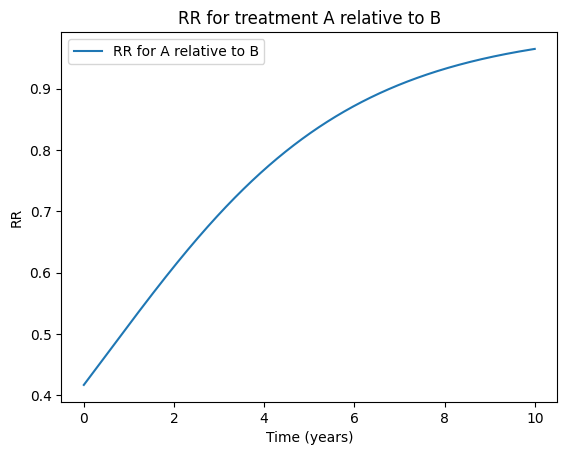

In [16]:
plt.plot(times, rr_A_rel_B, label='RR for A relative to B')
plt.xlabel('Time (years)')
plt.ylabel('RR')
plt.title('RR for treatment A relative to B')
plt.legend();

Notice that the RR changes over time.  In particular, early on, the death
curves are diverging quickly, and absolute values are small, so the RR is far
from 0. As the curves start to converge, over time, the RR approaches 1.  An RR
of 1 means that the relative risk of death is similar between A and B.


## On the hazard ratio

The Hazard Ratio (HR) is another way to compare survival (or, equivalently,
death) between two conditions.

The HR is the ratio of two *hazard rates*.  In our case, we will be comparing
the hazard rates for treatments A and B.

The hazard rate for death, is the rate of death at some particular time,
divided by the proportion still alive at that time.

The rate of death at a particular time is the slope of the death function.

Because we've used a mathematical function to generate the survival (and
therefore death) curve, we could calculate that slope using calculus, and in
particular, by taking the *derivative* of the death curve, but let's reduce the
mathematics by doing this slope calculation *numerically*.  We take slope at
any particular time to be the difference between the current death value and
the death value after a short time interval, divided by the length of time
interval ([slope](https://en.wikipedia.org/wiki/Slope) is change in y-axis
value divided by change in x-axis value, or *rise over run*).

Here is the death *rate* for A at 5 years, with a time interval of 0.0001
years:

In [17]:
death_A_5 = 1 - survival_a(5)  # Death at 5 years.
death_A_5p0001 = 1 - survival_a(5.0001)  # Death at 5.0001 years.
# Slope is change in y (above) divided by change in x (0.0001).
death_rate_A_5 = (death_A_5p0001 - death_A_5) / 0.0001
print('Death rate for A at 5 years:', death_rate_A_5)

Death rate for A at 5 years: 0.06295748498197362


Now we do this calculation for death rate for all our times array:

In [18]:
# Death rate for all our example times.
death_A = 1 - survival_a(times)
# Death rate for these times, each plus 0.0001.
death_Ap0001 = 1 - survival_a(times + 0.0001)
# Rates (slopes) for all times.
death_rate_A = (death_Ap0001 - death_A) / 0.0001
# Show the first 5 values of death_rate_A
death_rate_A[:5]

array([0.33332778, 0.33321669, 0.33310563, 0.33299462, 0.33288364])

We do the same for treatment B:

In [19]:
death_B = 1 - survival_b(times)
death_Bp0001 = 1 - survival_b(times + 0.0001)
death_rate_B = (death_Bp0001 - death_B) / 0.0001
# Show the first 5 values of death_rate_B
death_rate_B[:5]

array([0.799968  , 0.79932828, 0.79868908, 0.79805038, 0.79741219])

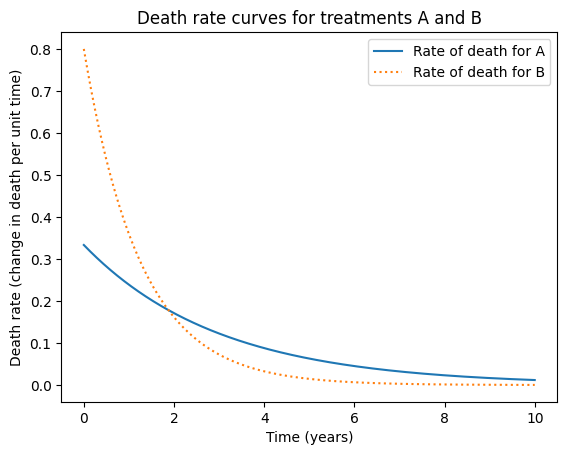

In [20]:
plt.plot(times, death_rate_A, label='Rate of death for A')
plt.plot(times, death_rate_B, linestyle=':', label='Rate of death for B')
plt.xlabel('Time (years)')
plt.ylabel('Death rate (change in death per unit time)')
plt.title('Death rate curves for treatments A and B')
plt.legend();

Notice that A has a higher death rate than B in middle years, but this is
because there are more people at risk of death in A, because more people have
survived.  We therefore adjust the death rate (above) by dividing by the
survival values, to give the death *hazard rate*.   This is the death rate,
accounting for the proportion still at risk from death.  Therefore, for any
particular time, this gives the rate of death for those still alive.

Here's the death *hazard rate* (*not the ratio*) for 5 years.  It's the death
rate (slope of the death curve) divided by the survival value for 5 years:

In [21]:
hazard_rate_A_5 = death_rate_A_5 / survival_a(5)
hazard_rate_A_5

np.float64(0.3333277778396756)

We do this calculation for all times, for both treatments, and plot:

In [22]:
hazard_rate_A = death_rate_A / survival_a(times)
hazard_rate_B = death_rate_B / survival_b(times)

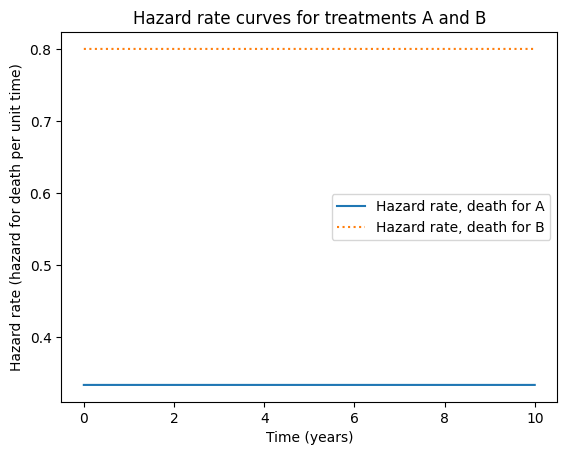

In [23]:
plt.plot(times, hazard_rate_A, label='Hazard rate, death for A')
plt.plot(times, hazard_rate_B, linestyle=':',
         label='Hazard rate, death for B')
plt.xlabel('Time (years)')
plt.ylabel('Hazard rate (hazard for death per unit time)')
plt.title('Hazard rate curves for treatments A and B')
plt.legend();

In our example, the hazard rates are the same at all times, for both
treatments.  This is a mathematical artefact of our use of simple exponential
functions to create the initial survival curves.  In general, with more
complicated survival curves, the hazard rates can vary over time.

The *hazard ratio (HR)* for (here) A relative to B is the *hazard rate* for
A divided by the hazard rate for B:

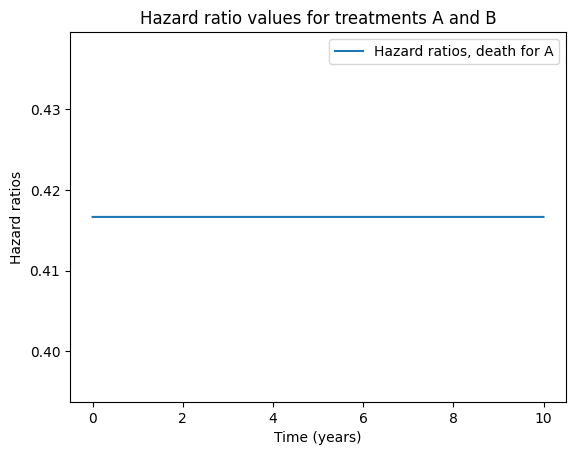

In [24]:
hazard_ratios = hazard_rate_A / hazard_rate_B
# Round these to the 8 decimal places to avoid calculation error,
# and a noisy but uniformative plot.
rounded_hrs = np.round(hazard_ratios, 8)
plt.plot(times, rounded_hrs, label='Hazard ratios, death for A')
plt.xlabel('Time (years)')
plt.ylabel('Hazard ratios')
plt.title('Hazard ratio values for treatments A and B')
plt.legend();

Because the hazard rates (in this case) were constant, then the hazard ratios
are constant, and therefore, we only need one hazard ratio value to summarize
the whole time-course:

In [25]:
# We take any of these values, because they are all very close
# (and in fact, the differences are just due to tiny imprecisions
# in the calculation).
# Let's just take the first.
HR = hazard_ratios[0]
print('HR for A relative to B:', HR)

HR for A relative to B: 0.41667638891000175


At this point we should say that it is an assumption of typical hazard ratio
calculations that the *hazard rates* are proportional across time, meaning that
the *hazard ratio* remains the same over time.  This is an assumption in most
HR calculations from models — see Appendix 1.

Notice too that the HR is approximately the same as the RR very near the start
of our time-course, but - in this case - much further from zero than the RR at
the end of the time-course.

## Estimating survival from the hazard rate

If the assumption of the proportional hazard rate holds, we can use
the single value HR to calculate the survival curve of A from the survival
curve of B (see appendix 2 below).

This is because it is possible (appendix 2) to show that the survival of A is
estimated by:

In [26]:
estimated_survival_A = survival_b(times) ** HR
# This gives an accurate estimate of survival_A to 4 decimal places.
np.allclose(estimated_survival_A, survival_a(times), atol=0.0001)

True

The HR is a *ratio*; it is the hazard rate for A divided by that for B.
Therefore the HR for B relative to A is given by `1 / HR` and:

In [27]:
estimated_survival_B = survival_a(times) ** (1 / HR)
# This gives an accurate estimate of survival_B to 4 decimal places.
np.allclose(estimated_survival_B, survival_b(times), atol=0.0001)

True

## Interim summary

We have seen that, under the most common *proportional hazards* models, the HR
is assumed constant over time, and therefore can be represented by a single
number.

Although the HR does not change over time, the RR does change over time, as
a result of the operation of the rate captured by the HR.

HR is rather difficult to explain, but RR is not.   Luckily the rule above
allows us to calculate survival for one group for any give time, given the
survival for the other group at that time and the HR.  We can then calculate
the corresponding RR.


## Example — estimating RR from HR

Consider the trial reported in Fisher *et al* 2002 (N Engl J Med, Vol. 347,
p 1223).   They compared treatments for breast cancer, including Mastectomy
(Mx) (total removal of the affected breast) — and Breast Conserving Surgery
(BCS) (only removing the tumor with some tissue around it for safety).

They found an overall survival at 20 years of 0.47 (47%) in the Mastectomy (Mx)
group, and overall survival of 0.46 for the BCS group.  They also report a HR
of 1.05 for BCS relative to Mastectomy for overall survival.

We can calculate the RR directly from these numbers, but what if we did not
have the overall survival for the BCS group, for some reason?  We could
estimate it using the HR.

In [28]:
survival_mx = 0.47
mx_bcs_hr = 1.05
est_survival_bcs = survival_mx ** mx_bcs_hr
print("Estimated survival for BCS group using HR:", est_survival_bcs)

Estimated survival for BCS group using HR: 0.45258770406182747


This is a reasonable approximation to the actual value for BCS of 0.46.

We can then calculate the estimated relative risk by using the risks, given by
one minus the survival proportions:

In [29]:
est_rr = (1 - est_survival_bcs) / (1 - survival_mx)
print('Estimated RR for BCS relative to Mx:', est_rr)

Estimated RR for BCS relative to Mx: 1.0328533885625897


## Appendix 1: Technical note on proportional hazards

For more technical detail, see [Wikipedia on the Proportional Hazards
Model](https://en.wikipedia.org/wiki/Proportional_hazards_model).

When using a proportional hazards model in comparing the two hazard rate curves
for A and B, we would be comparing the curves at two different values of
a *covariate* in the model. For this categorical covariate, expressing the
difference between A and B, the covariate might have value 1 for treatment
A and 0 for treatment B.  From the page above:

> The proportional hazards condition states that covariates are
multiplicatively related to the hazard.

In our case, in the proportional hazards model, our assumption is that the
hazard rate of A is given by the hazard rate of B times some constant $c$.  HR
is our preferred name for that constant $c$.


## Appendix 2: Estimating survival from the hazard ratio

You do not need the following mathematics to understand the argument in the
page above.

The mathematics here comes from the explanation for the calculation of survival
from HR given at <https://realrisklight.wintoncentre.uk>, with thanks. We have
edited it lightly to match this page.

For context, in our case, the function $S_A$ is the survival function for
treatment A, meaning, the function that accepts a time $t$ and returns
a survival value.  In our example above, $S_A$ is the mathematical notation for
our Python function `survival_a`. Thus $S_A(t)$ is the survival proportion
(probability) at time $t$.  $S_B$ is the corresponding function giving the
values for the B survival curve (`survival_b` above).  The functions $h_A$ and
$h_B$ are the functions giving the values for the hazard rates of A and
B respectively. We'll call A — the "active" group, and B — the "baseline"
group.  Thus $h_A(t)$ is the hazard rate for treatment A (the "active"
treatment) for a given time $t$.

By definition, $\text{HR} = \frac{h_A(t)}{h_B(t)}$, where $h_A(t)$,$h_B(t)$ are
the hazards in the "active" and "baseline" groups respectively at time $t$.

We haven't defined these functions in Python above, we've just calculated
values for the functions, but we could define the hazard functions from the
survival functions, like this:

In [30]:
def generic_hazard_rate(t, survival_func, dt=0.0001):
    """ Hazard rate at time(s) t, given a particular survival function.

    The survival function is a Python function we can call, that will give us
    survival value(s) at any given time(s).

    Parameters
    ----------
    t : float or sequence of float.
        Time value(s) at which to evaluate hazard rate.
    survival_func : function
        Function accepting time(s) such as those in `t` and returning
        corresponding survival values.
    dt : float, optional
        Small time interval over which to estimate slope when estimating death
        rate. Default is 0.0001.

    Returns
    -------
    haz_rate : array
        Hazard rates at time(s) `t`.
    """
    # Survival and death at time(s) t.
    survival = survival_func(t)
    death = 1 - survival
    # Survival and death some short time after time(s) t.
    later_t = t + dt
    survival_later = survival_func(later_t)
    death_later = 1 - survival_later
    # Slope(s) of death curve at time(s) t.
    death_rate = (death_later - death) / dt
    # Hazard rate.
    return death_rate / survival


def h_A(t):
    """ Hazard rate function for treatment A

    Uses generic hazard rate function with specific survival function
    ``survival_a``.
    """
    return generic_hazard_rate(t, survival_a, 0.0001)


def h_B(t):
    """ Hazard rate function for treatment B

    Uses generic hazard rate function with specific survival function
    ``survival_b``.
    """
    return generic_hazard_rate(t, survival_b, 0.0001)


# Hazard ratio at 5 years.
HR = h_A(5) / h_B(5)
print('Hazard ratio at 5 years:', HR)

Hazard ratio at 5 years: 0.4166763888988864


For our simple example, the proportional hazards assumption holds, as we have seen.

In [31]:
# Same (within calculation error) for 10 years.
h_A(10) / h_B(10)
print('Hazard ratio at 10 years:', HR)

Hazard ratio at 10 years: 0.4166763888988864


Therefore $\text{HR}=\frac{H_A(t)}{H_B(t)}$, where $H_A(t)$, $H_B(t)$ are the
cumulative hazards.

(The previous step depends on the assumption of proportional hazards.  On that
assumption, there is some scalar $\text{HR}$ such that $h_A(t) = \text{HR}
\ h_B(t)$ as above.  Therefore when we integrate $h_A(t)$ to $H_A(t)$, and
$h_B(t)$ to $H_B(t)$, it is also true that $H_A(t) = \text{HR}\ H_B(t)$.)


In [32]:
def H_A(t):
    """Cumulative hazard rate function for A
    """
    return np.cumsum(h_A(t))


def H_B(t):
    """Cumulative hazard rate function for B
    """
    return np.cumsum(h_B(t))


HR = H_A(5) / H_B(5)
print('Hazard ratio from cumulative hazards at 5 years:', HR)

Hazard ratio from cumulative hazards at 5 years: [0.41667639]


In [33]:
# Same (within calculation error) for 10 years.
print('Hazard ratio from cumulative hazards at 5 years:', H_A(10) / H_B(10))

Hazard ratio from cumulative hazards at 5 years: [0.41667639]


A standard result is that $H_A(t)=-\log S_A(t)$, $H_B(t)=-\log S_B(t)$, where
$S_A(t)$,$S_B(t)$ are the survival probabilities up to time $t$.

See these links for explanations of the result above:

* [Towards DataScience
  article](https://towardsdatascience.com/the-mathematical-relationship-between-the-survival-function-and-hazard-function-74559bb6cc34).
* [GraphPad
   explanation](https://www.graphpad.com/guides/prism/latest/statistics/stat_cox_math_cumulative_hazard.htm).
* [A nice Youtube walkthough](https://www.youtube.com/watch?v=zAdF8WSyfsA) by
  [Zedstatistics](https://www.zstatistics.com).

Therefore:

$$
\text{HR}=\frac{\log S_A(t)}{\log S_B(t)}
$$

In [34]:
# Numerically, for our example.
HR = np.log(survival_a(5)) / np.log(survival_b(5))
print('Hazard ratio from -log survival at 5 years:', HR)

Hazard ratio from -log survival at 5 years: 0.41666666666666663


Rearranging gives:

$$
S_A(t) = S_B(t)^{\text{HR}}
$$

In [35]:
# Numerical check, for 5 years, for our example.
np.isclose(survival_a(5), survival_b(5) ** HR)

np.True_

In [36]:
# And for 10 years.
np.isclose(survival_a(10), survival_b(10) ** HR)

np.True_